In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

eda_df = pd.read_csv("/Users/cgp/Portfolio/WeatherDemand/wede/data/gold/demand_forecast_data.csv", parse_dates=['datetime'])
print(f"Loaded: {eda_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26520 entries, 0 to 26519
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   datetime            26520 non-null  datetime64[ns, UTC]
 1   temperature         26520 non-null  float64            
 2   humidity            26520 non-null  float64            
 3   precipitation       26520 non-null  float64            
 4   rain                26520 non-null  float64            
 5   snowfall            26520 non-null  float64            
 6   wind_speed          26520 non-null  float64            
 7   cloud_cover         26520 non-null  float64            
 8   is_day              26520 non-null  float64            
 9   sunrise             26520 non-null  object             
 10  sunset              26520 non-null  object             
 11  hour                26520 non-null  int64              
 12  day_of_week         26520 non-nu

In [3]:
target_cols = ['delivery_demand', 'energy_demand', 'retail_demand', 'ecommerce_demand']

feature_cols = [col for col in eda_df.columns if col not in target_cols + ['datetime', 'sunrise', 'sunset'] and not col.endswith('_anomaly')]
feature_cols

['temperature',
 'humidity',
 'precipitation',
 'rain',
 'snowfall',
 'wind_speed',
 'cloud_cover',
 'is_day',
 'hour',
 'day_of_week',
 'month',
 'is_weekend',
 'daylight_duration',
 'precipitation_flag',
 'temp_category',
 'bad_weather_combo',
 'is_peak_hour',
 'season']

### EDA

In [4]:
# Data Stats 
eda_df[feature_cols + target_cols].describe().round(5)

,temperature,humidity,precipitation,rain,snowfall,wind_speed,cloud_cover,is_day,hour,day_of_week,...,daylight_duration,precipitation_flag,temp_category,bad_weather_combo,is_peak_hour,season,delivery_demand,energy_demand,retail_demand,ecommerce_demand
count,26520.00000,26520.00000,26520.00000,26520.00000,26520.0000,26520.00000,26520.00000,26520.00000,26520.00000,26520.00000,...,26520.00000,26520.00000,26520.00000,26520.00000,26520.00000,26520.00000,26520.00000,26520.00000,26520.00000,26520.00000
mean,10.42679,80.07845,0.20257,0.18900,0.0095,9.68374,64.37741,0.50871,11.50000,2.99789,...,12.22110,0.13401,1.32651,0.00302,0.29167,1.49050,146.94600,548.72195,209.46369,183.50400
std,6.44807,13.85566,0.61283,0.58296,0.1111,5.86254,42.00985,0.49993,6.92232,1.99966,...,2.76187,0.41201,0.98205,0.05484,0.45454,1.11842,40.68709,151.07274,93.19914,50.54775
min,-14.05000,17.73434,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,...,8.18667,0.00000,0.00000,0.00000,0.00000,0.00000,17.00000,81.00000,0.00000,22.00000
25%,5.55000,71.65365,0.00000,0.00000,0.0000,5.19511,14.00000,0.00000,5.75000,1.00000,...,9.54889,0.00000,1.00000,0.00000,0.00000,0.00000,123.00000,457.00000,132.00000,154.00000
50%,9.65000,83.34428,0.00000,0.00000,0.0000,8.72768,95.00000,1.00000,11.50000,3.00000,...,12.22639,0.00000,1.00000,0.00000,0.00000,1.00000,143.00000,529.00000,196.00000,177.00000
75%,15.30000,91.05921,0.00000,0.00000,0.0000,13.33944,100.00000,1.00000,17.25000,5.00000,...,14.88778,0.00000,2.00000,0.00000,1.00000,2.00000,166.00000,615.00000,276.00000,207.00000
max,29.15000,100.00000,11.00000,9.40000,4.1300,52.50110,100.00000,1.00000,23.00000,6.00000,...,16.24306,3.00000,4.00000,1.00000,1.00000,3.00000,512.00000,2194.00000,937.00000,636.00000


In [5]:
eda_df[feature_cols + target_cols].dtypes

temperature           float64
humidity              float64
precipitation         float64
rain                  float64
snowfall              float64
wind_speed            float64
cloud_cover           float64
is_day                float64
hour                    int64
day_of_week             int64
month                   int64
is_weekend              int64
daylight_duration     float64
precipitation_flag      int64
temp_category           int64
bad_weather_combo       int64
is_peak_hour            int64
season                  int64
delivery_demand         int64
energy_demand           int64
retail_demand           int64
ecommerce_demand        int64
dtype: object

### Correlation 

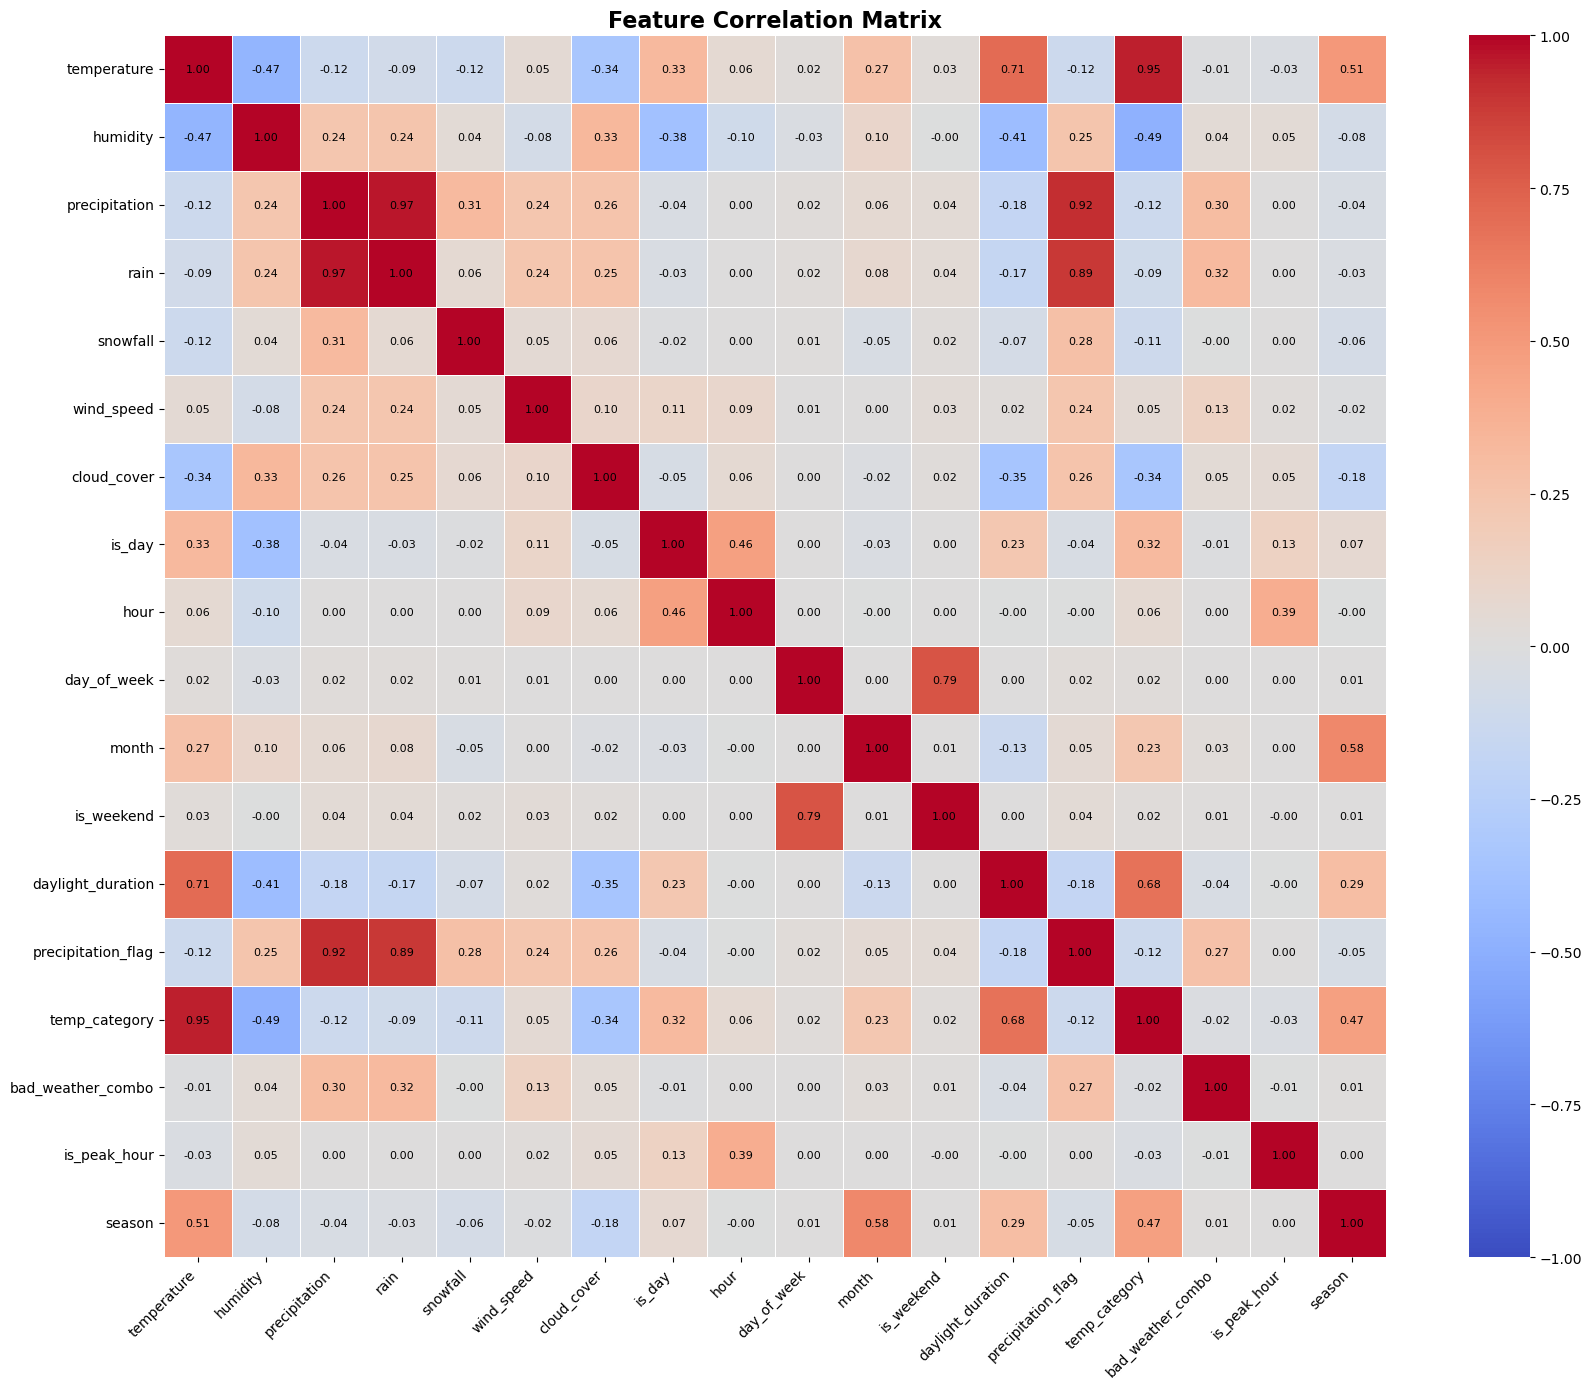

Correlations > 0.75:


,Feature 1,Feature 2,Correlation
1,precipitation,rain,0.965995
0,temperature,temp_category,0.946566
2,precipitation,precipitation_flag,0.918464
3,rain,precipitation_flag,0.889579
4,day_of_week,is_weekend,0.790301


In [8]:
plt.figure(figsize=(18, 14))
corr_matrix = eda_df[feature_cols].corr(numeric_only=True)

# Create heatmap without annotations first
ax = sns.heatmap(corr_matrix, cmap="coolwarm", center=0, square=True, 
                 linewidths=0.5, vmin=-1, vmax=1, cbar=True)

# Manually add text
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        ax.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.2f}',
                ha='center', va='center', fontsize=8, color='black')

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            high_corr.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

print("Correlations > 0.75:")
pd.DataFrame(high_corr).sort_values('Correlation', ascending=False)

dropping the above columns because When features are highly correlated, regression models can't tell which one is actually affecting the target.
Redundant information, rain and precipitation are basically the same thing. Keeping both doesn't add new info, just noise.

In [10]:
drop_cols = ['rain', 'temp_category', 'precipitation_flag', 'is_weekend']
model_features = [f for f in feature_cols if f not in drop_cols]
print(model_features)

['temperature', 'humidity', 'precipitation', 'snowfall', 'wind_speed', 'cloud_cover', 'is_day', 'hour', 'day_of_week', 'month', 'daylight_duration', 'bad_weather_combo', 'is_peak_hour', 'season']


### Graphs

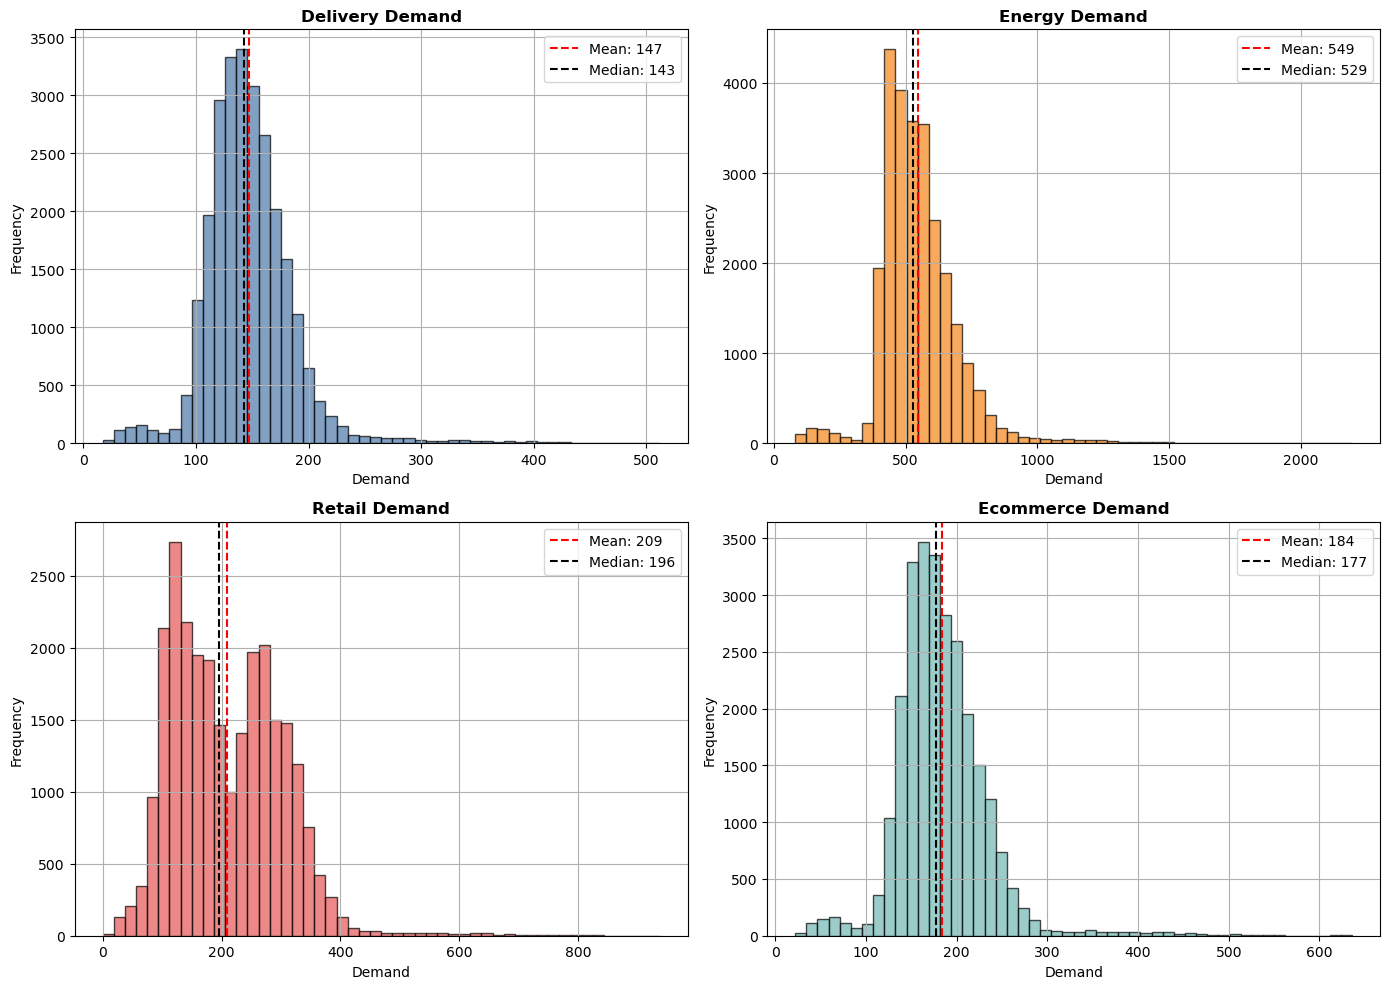

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

targets = ['delivery_demand', 'energy_demand', 'retail_demand', 'ecommerce_demand']
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2']

for ax, target, color in zip(axes.flat, targets, colors):
    eda_df[target].hist(bins=50, ax=ax, color=color, edgecolor='black', alpha=0.7)
    ax.axvline(eda_df[target].mean(), color='red', linestyle='--', label=f'Mean: {eda_df[target].mean():.0f}')
    ax.axvline(eda_df[target].median(), color='black', linestyle='--', label=f'Median: {eda_df[target].median():.0f}')
    ax.set_title(target.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_xlabel('Demand')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

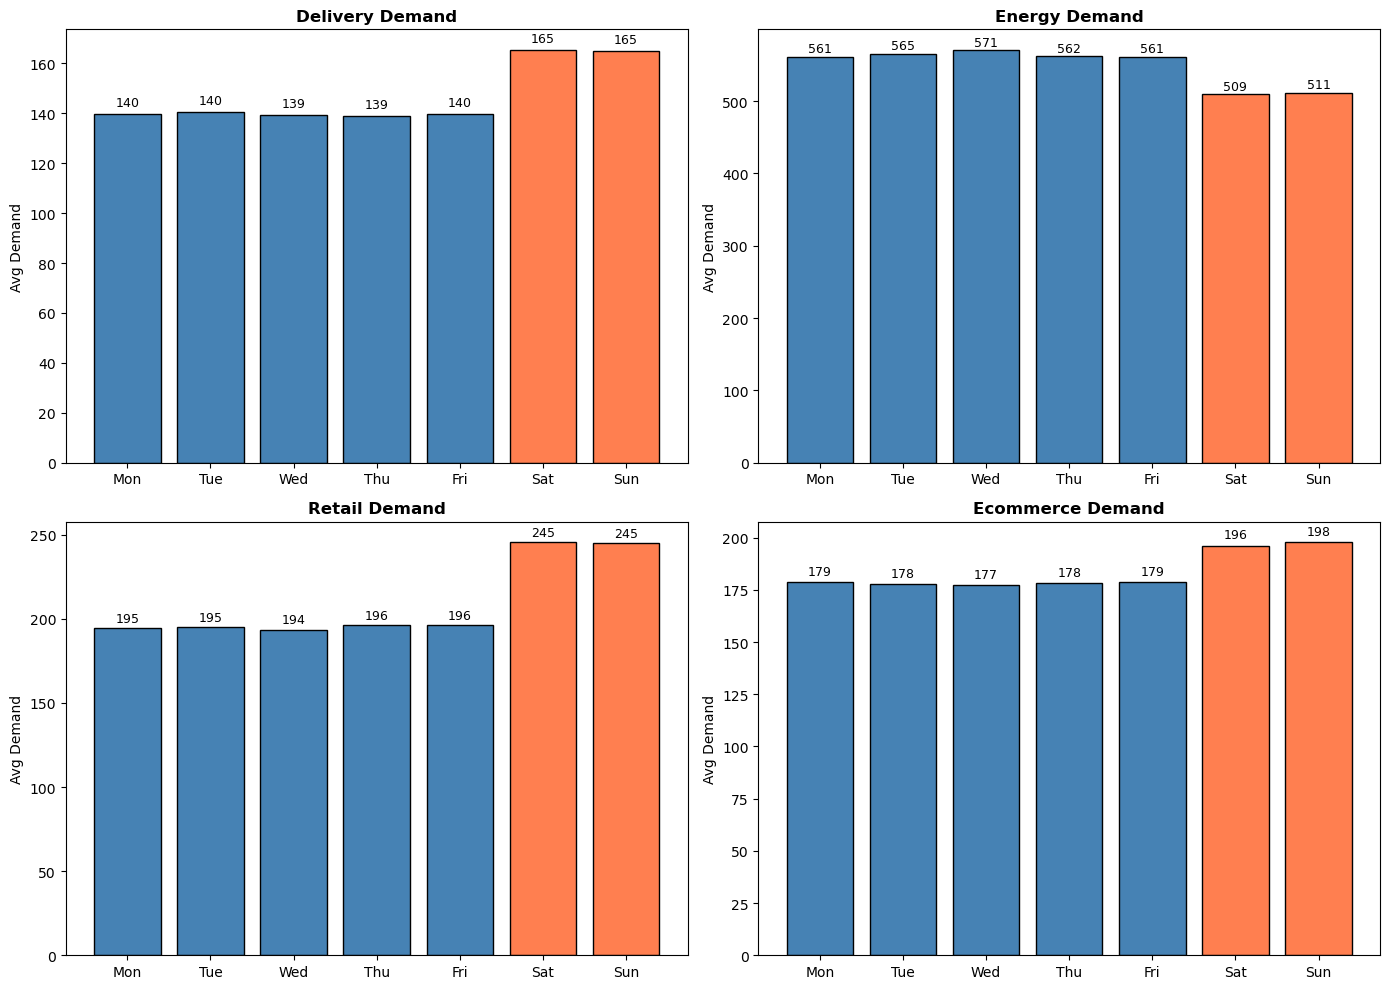

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

targets = ['delivery_demand', 'energy_demand', 'retail_demand', 'ecommerce_demand']
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for ax, target in zip(axes.flat, targets):
    day_avg = eda_df.groupby('day_of_week')[target].mean()
    bars = ax.bar(days, day_avg.values, color=['steelblue']*5 + ['coral']*2, edgecolor='black')
    ax.set_title(target.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Avg Demand')
    for bar, val in zip(bars, day_avg.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                f'{val:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

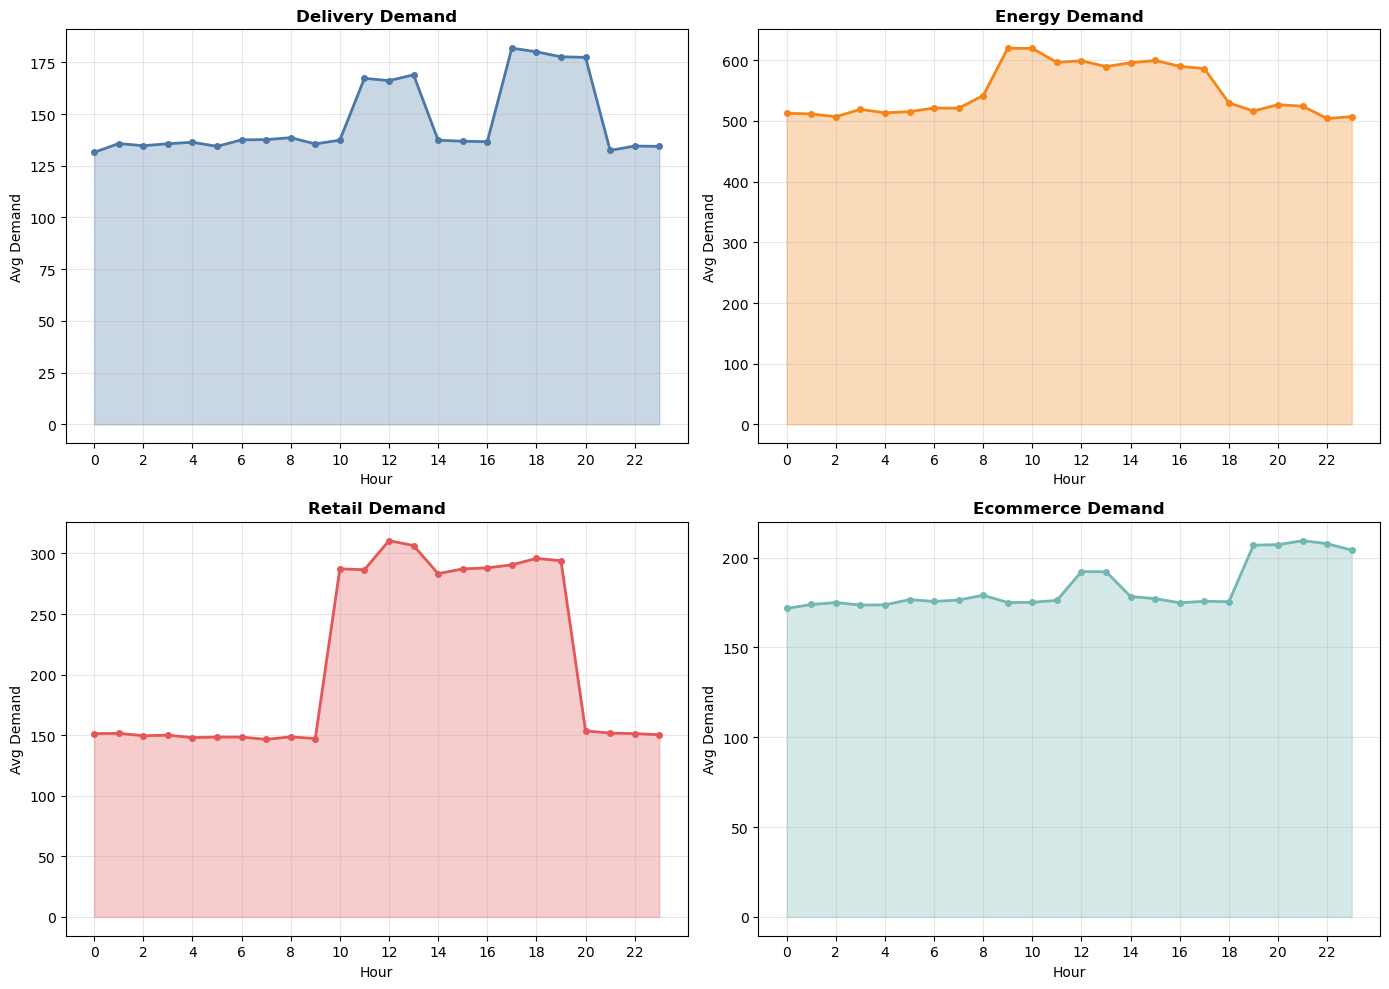

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

targets = ['delivery_demand', 'energy_demand', 'retail_demand', 'ecommerce_demand']
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2']

for ax, target, color in zip(axes.flat, targets, colors):
    hour_avg = eda_df.groupby('hour')[target].mean()
    ax.plot(hour_avg.index, hour_avg.values, marker='o', linewidth=2, markersize=4, color=color)
    ax.fill_between(hour_avg.index, hour_avg.values, alpha=0.3, color=color)
    ax.set_title(target.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Avg Demand')
    ax.set_xticks(range(0, 24, 2))
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

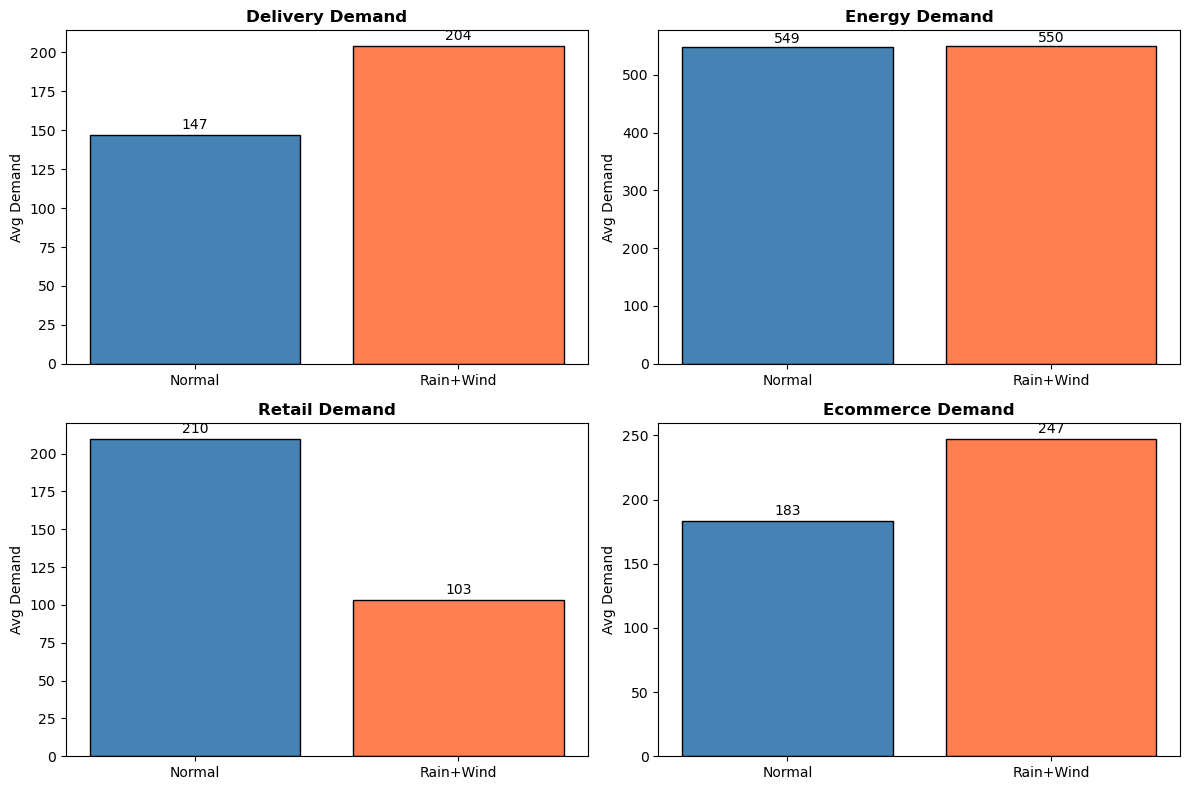

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

targets = ['delivery_demand', 'energy_demand', 'retail_demand', 'ecommerce_demand']

for ax, target in zip(axes.flat, targets):
    weather_avg = eda_df.groupby('bad_weather_combo')[target].mean()
    bars = ax.bar(['Normal', 'Rain+Wind'], weather_avg.values, color=['steelblue', 'coral'], edgecolor='black')
    ax.set_title(target.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Avg Demand')
    for bar, val in zip(bars, weather_avg.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                f'{val:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

/var/folders/p0/5fj69jjs0fnf6prskk1y53yc0000gn/T/ipykernel_85824/1566133237.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg = eda_df.groupby(pd.cut(eda_df['temperature'], bins=10))[target].mean()
/var/folders/p0/5fj69jjs0fnf6prskk1y53yc0000gn/T/ipykernel_85824/1566133237.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg = eda_df.groupby(pd.cut(eda_df['temperature'], bins=10))[target].mean()
/var/folders/p0/5fj69jjs0fnf6prskk1y53yc0000gn/T/ipykernel_85824/1566133237.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas

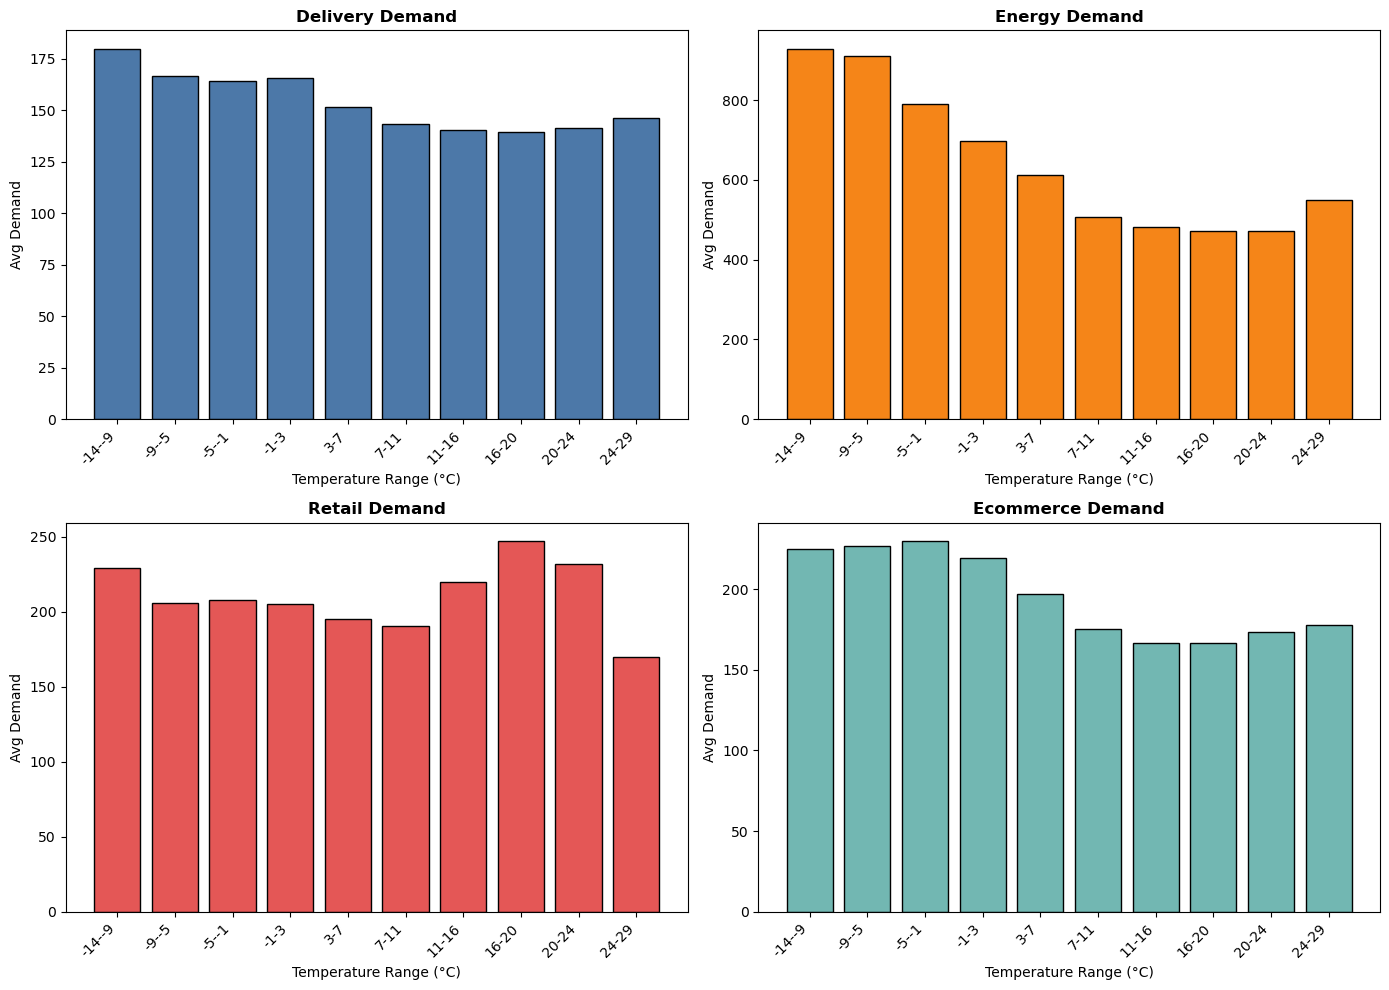

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

targets = ['delivery_demand', 'energy_demand', 'retail_demand', 'ecommerce_demand']
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2']

for ax, target, color in zip(axes.flat, targets, colors):
    temp_avg = eda_df.groupby(pd.cut(eda_df['temperature'], bins=10))[target].mean()
    ax.bar(range(len(temp_avg)), temp_avg.values, color=color, edgecolor='black')
    ax.set_title(target.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_xlabel('Temperature Range (°C)')
    ax.set_ylabel('Avg Demand')
    ax.set_xticks(range(len(temp_avg)))
    ax.set_xticklabels([f'{int(i.left)}-{int(i.right)}' for i in temp_avg.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()